# Load modules

In [27]:
import sys
import importlib

#sys.path.append(r'./simpleNFB/spmpy') # folder containing spmpy folder
#from spmpy import Spm # <-- Spm class
#import spmpy # <--- spmpy library
#importlib.reload(spmpy)

sys.path.append(r'./simpleNFB')
from simpleNFB import snfb
importlib.reload(snfb)

import numpy as np
import matplotlib.pyplot as plt

from IPython import display
from IPython.display import HTML
display.display(HTML("<style>.container { width:100% !important; }</style>"))

dataDirectory = r'K:\Labs205\Labs\THz-STM\raw data\_spmpy_test_data' 
'''
the dataDirectory is used as a reference location for the collection of measurement folders containing .dat and .sxm files
The browsers are capable of seeing files one directory lower than the dataDirectory location

/dataDirectory
    /00_Au111_clean
        /img0001.sxm
        /img0002.sxm
        /dIdV0001.dat
        /dIdV0002.dat
    /01_Au111_NaCl
        /img0001.sxm
        /img0002.sxm
        /dIdV0001.dat
        /dIdV0002.dat
        
the folders 00_Au111_clean and 01_Au111_NaCl will be selectable in the browser Folders selection list
the sxm and dat files will be visible in the Files selction list of the imageBrowser and specBrowser, respectively
'''
#dataDirectory = r'K:\Labs205\Labs\THz-STM\raw data\amsp\00_486a_630a'

%matplotlib widget

# Browser .SXM Files

In [28]:
# closes previous imageBrowser figure if it exists
figs = list(plt.get_figlabels())
if 'sxm' in figs: plt.close('sxm')
imageBrowser = snfb.sxmBrowser(titlesize=9,home_directory=dataDirectory,cmap='bone')

Box(children=(Box(children=(Select(description='Folders:', options=(WindowsPath('K:/Labs205/Labs/THz-STM/raw d…

# Browse .Dat Files

In [29]:
# closes previous specBrowser figure if it exists
figs = list(plt.get_figlabels())
if 'dat' in figs: plt.close('dat')
specBrowser = snfb.datBrowser(figsize=(7,5),titlesize=9,sxmBrowser=imageBrowser,home_directory=dataDirectory,cmap='Paired')

Box(children=(Box(children=(Select(description='Folders:', options=(WindowsPath('K:/Labs205/Labs/THz-STM/raw d…

In [23]:
str(specBrowser.directorySelection.value).split("\\")[-1]

'experimental_files'

### How to access data from the browsers

In [60]:
'''
call help(imageBrowser) or help(specBrowser) for additional details

For both browsers, when a file or files are selected the data is loaded into the class. The following are attributes that hold the file data which can be used for analysis within the notebook

-- SXM Browser --
image_data = imageBrowser.image_data --> this is the raw image_data and does not include any post-processing that is applied in the browser figure

-- DAT Browser --
--> The dat browser is capable of displaying multiple files, therefore the data is stored in an array as follows
y_channel_data = specBrowser.spec
x_channel_data = specBrowser.spec_x
''';

# Analysis example: Waterfall Plot - dI/dV vs Distance

Text(0.5, 1.0, 'dI/dV')

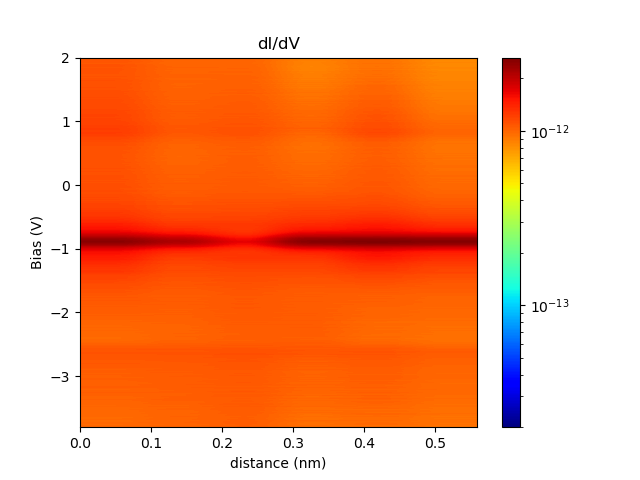

In [42]:
from matplotlib.colors import LogNorm
positions = []
distances = []
for spec in specBrowser.spec:
    positions.append([spec.get_param('x')[0],spec.get_param('y')[0]])
x_0,y_0 = positions[0]
for p in positions:
    x_a = p[0]-x_0
    y_a = p[1]-y_0
    distances.append(np.sqrt(x_a**2 + y_a**2))
fig = plt.figure()
try :
    fig = plt.close(fig)
except:
    pass
fig = plt.figure()
dataMin = np.min(specBrowser.spec_data)
dataMax = np.max(specBrowser.spec_data)
plt.imshow(np.rot90(specBrowser.spec_data),extent=[distances[0],distances[-1],-3.8,2],aspect='auto',cmap='jet',norm=LogNorm(vmin=2e-14,vmax=dataMax)) #,norm=LogNorm(vmin=2e-14,vmax=dataMax)
#plt.imshow(np.rot90(specBrowser.spec_data),extent=[1,len(specBrowser.spec_data),-1.5,1.5],aspect='auto',cmap='jet') #,norm=LogNorm(vmin=2e-14,vmax=dataMax)
plt.xlabel('distance (nm)')
plt.ylabel('Bias (V)')
plt.colorbar()
plt.title('dI/dV')

# Preview all matplotlib colormaps

mpl version: 3.4.3,
number of cmaps: 166


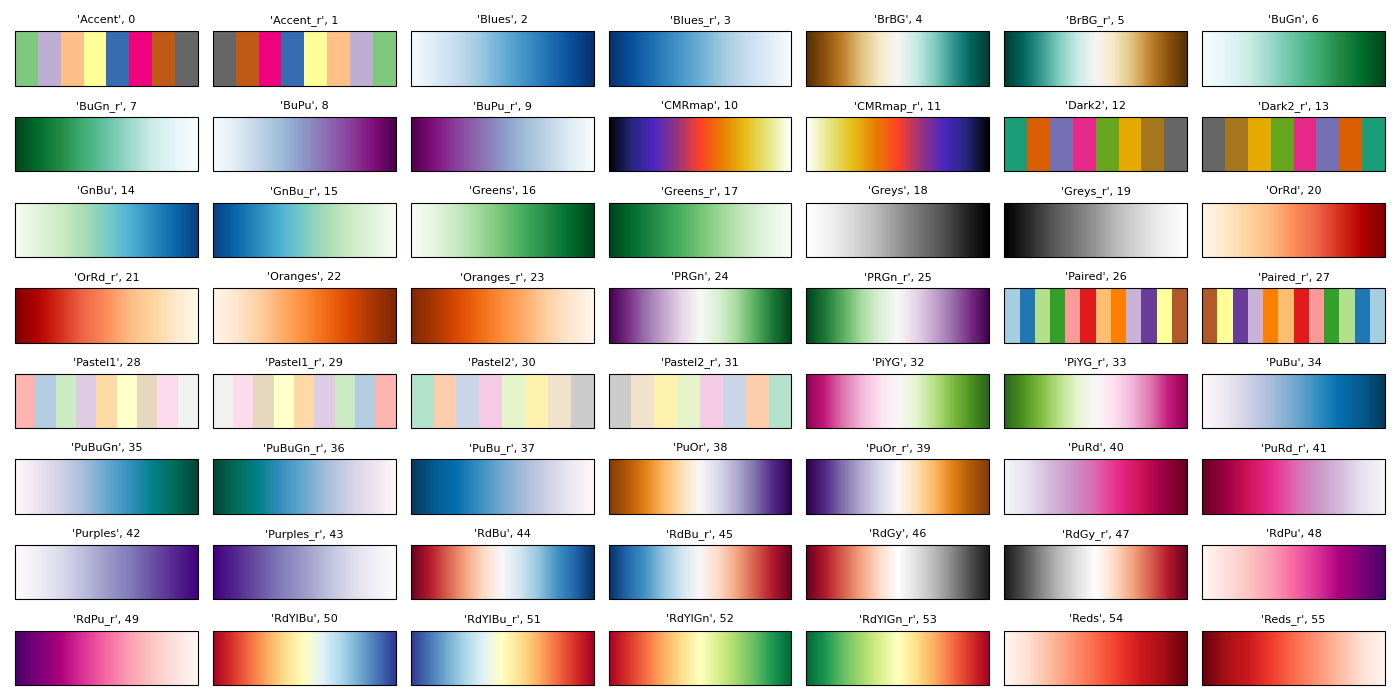

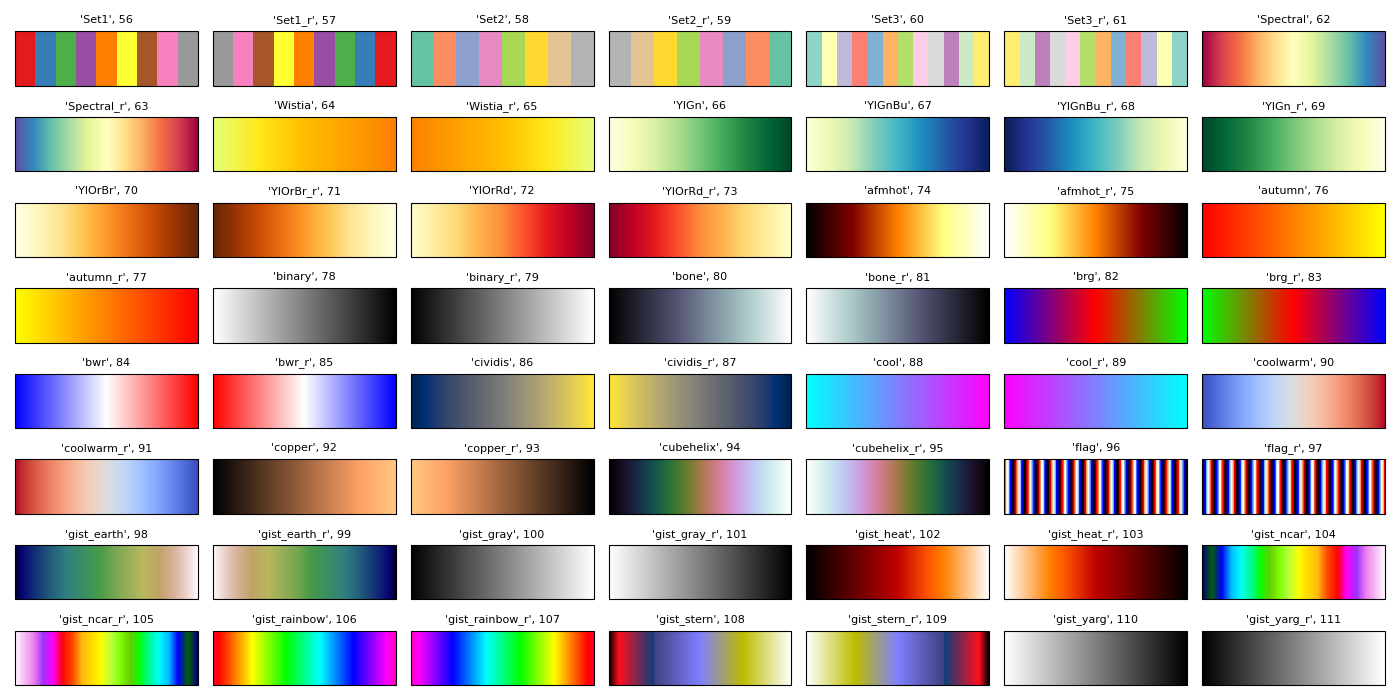

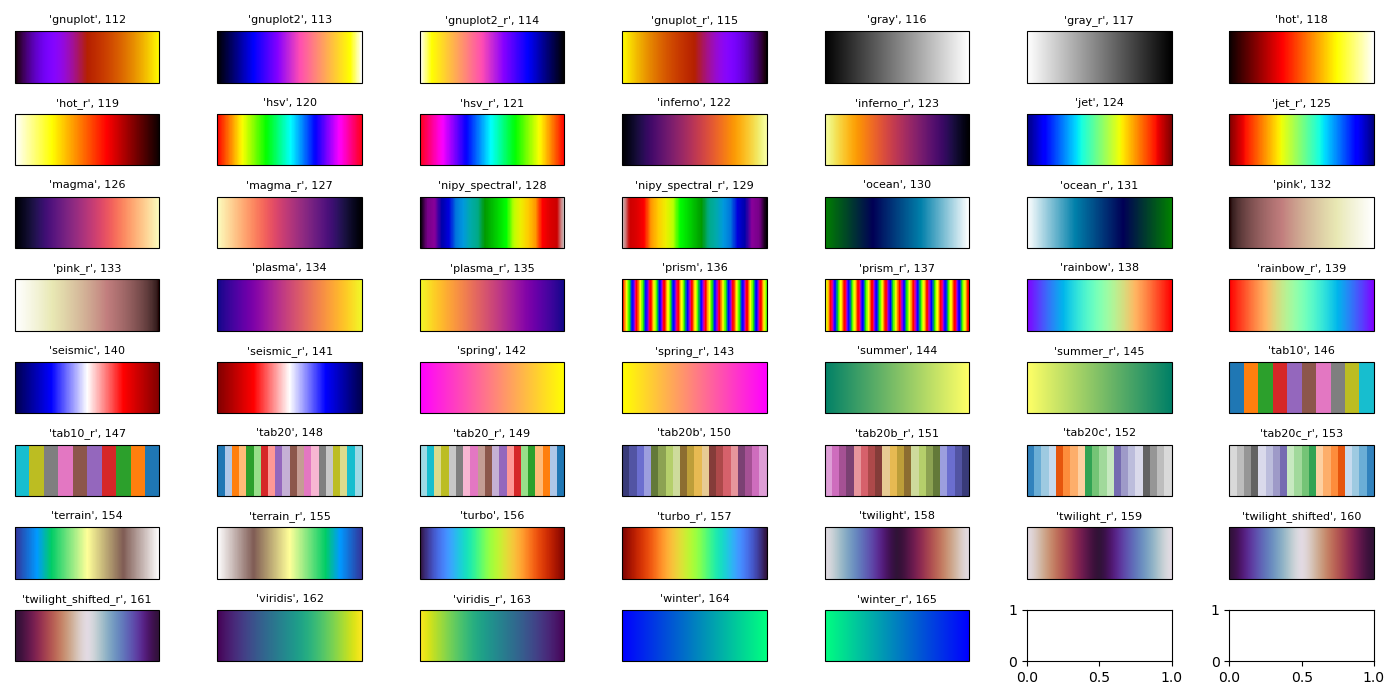

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_all_cmaps():
    N_ROWS, N_COLS = 8, 7 # 13, 13 <-- for all in one figure 
    HEIGHT, WIDTH = 7, 14

    cmap_ids = plt.colormaps()
    n_cmaps = len(cmap_ids)
    
    print(f'mpl version: {mpl.__version__},\nnumber of cmaps: {n_cmaps}')
    
    index = 0
    while index < n_cmaps:
        fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(WIDTH, HEIGHT))
        for row in range(N_ROWS):
            for col in range(N_COLS):
                ax = axes[row, col]
                cmap_id = cmap_ids[index]
                cmap = plt.get_cmap(cmap_id)
                mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                          orientation='horizontal')
                ax.set_title(f"'{cmap_id}', {index}", fontsize=8)
                ax.tick_params(left=False, right=False, labelleft=False,
                               labelbottom=False, bottom=False)
                
                last_iteration = index == n_cmaps-1
                if (row==N_ROWS-1 and col==N_COLS-1) or last_iteration:
                    plt.tight_layout()
                    #plt.savefig('colormaps'+str(index)+'.png')
                    plt.show()
                    if last_iteration: return
                index += 1

plot_all_cmaps()